In [1]:
library(tidyverse)
library(nnet)
library(purrr)
library(furrr)
library(lme4)
library(ggplot2)
library(patchwork)
library(ggbeeswarm)

options(ggrepel.max.overlaps = Inf)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   0.3.4
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: future

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack




In [2]:
# xe_obj = qs::qread('230710_xenium_sct_unimapped_cca_polar_label.qs')
xe_obj_path = '_targets/objects/xe_obj_cca_td_2s_uni'
xe_obj = qs::qread(xe_obj_path)
xe_obj@meta.data = xe_obj@meta.data %>%
mutate(predicted.polar_label = polar_label) %>%
filter(!is.na(predicted.polar_label))
  

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [3]:
xe_obj

Loading required package: Seurat



An object of class Seurat 
575 features across 60337 samples within 6 assays 
Active assay: SCT (100 features, 100 variable features)
 3 layers present: counts, data, scale.data
 5 other assays present: Xenium, BlankCodeword, ControlCodeword, ControlProbe, prediction.score.id
 1 dimensional reduction calculated: umap
 15 spatial fields of view present: fov fov.1 fov.2 fov.3 fov.4 fov.5 fov.6 fov.7 fov.1.2 fov.2.2 fov.3.2 fov.4.2 fov.5.2 fov.6.2 fov.7.2

In [6]:
xe_obj %>% `[[` %>% colnames

[1] "orig.ident"                       "nCount_Xenium"                   
 [3] "nFeature_Xenium"                  "nCount_BlankCodeword"            
 [5] "nFeature_BlankCodeword"           "nCount_ControlCodeword"          
 [7] "nFeature_ControlCodeword"         "nCount_ControlProbe"             
 [9] "nFeature_ControlProbe"            "cell_area"                       
[11] "density"                          "elongation"                      
[13] "avg_confidence"                   "nucleus_area"                    
[15] "sample_name"                      "treatment"                       
[17] "strain"                           "time"                            
[19] "nCount_SCT"                       "nFeature_SCT"                    
[21] "predicted.id.score"               "predicted.id"                    
[23] "cell_class"                       "cell_class_prediction.score.max" 
[25] "polar_label"                      "polar_label_prediction.score.max"
[27] "labels"                           "labels_prediction.score.max"     
[29] "predicted.polar_label"

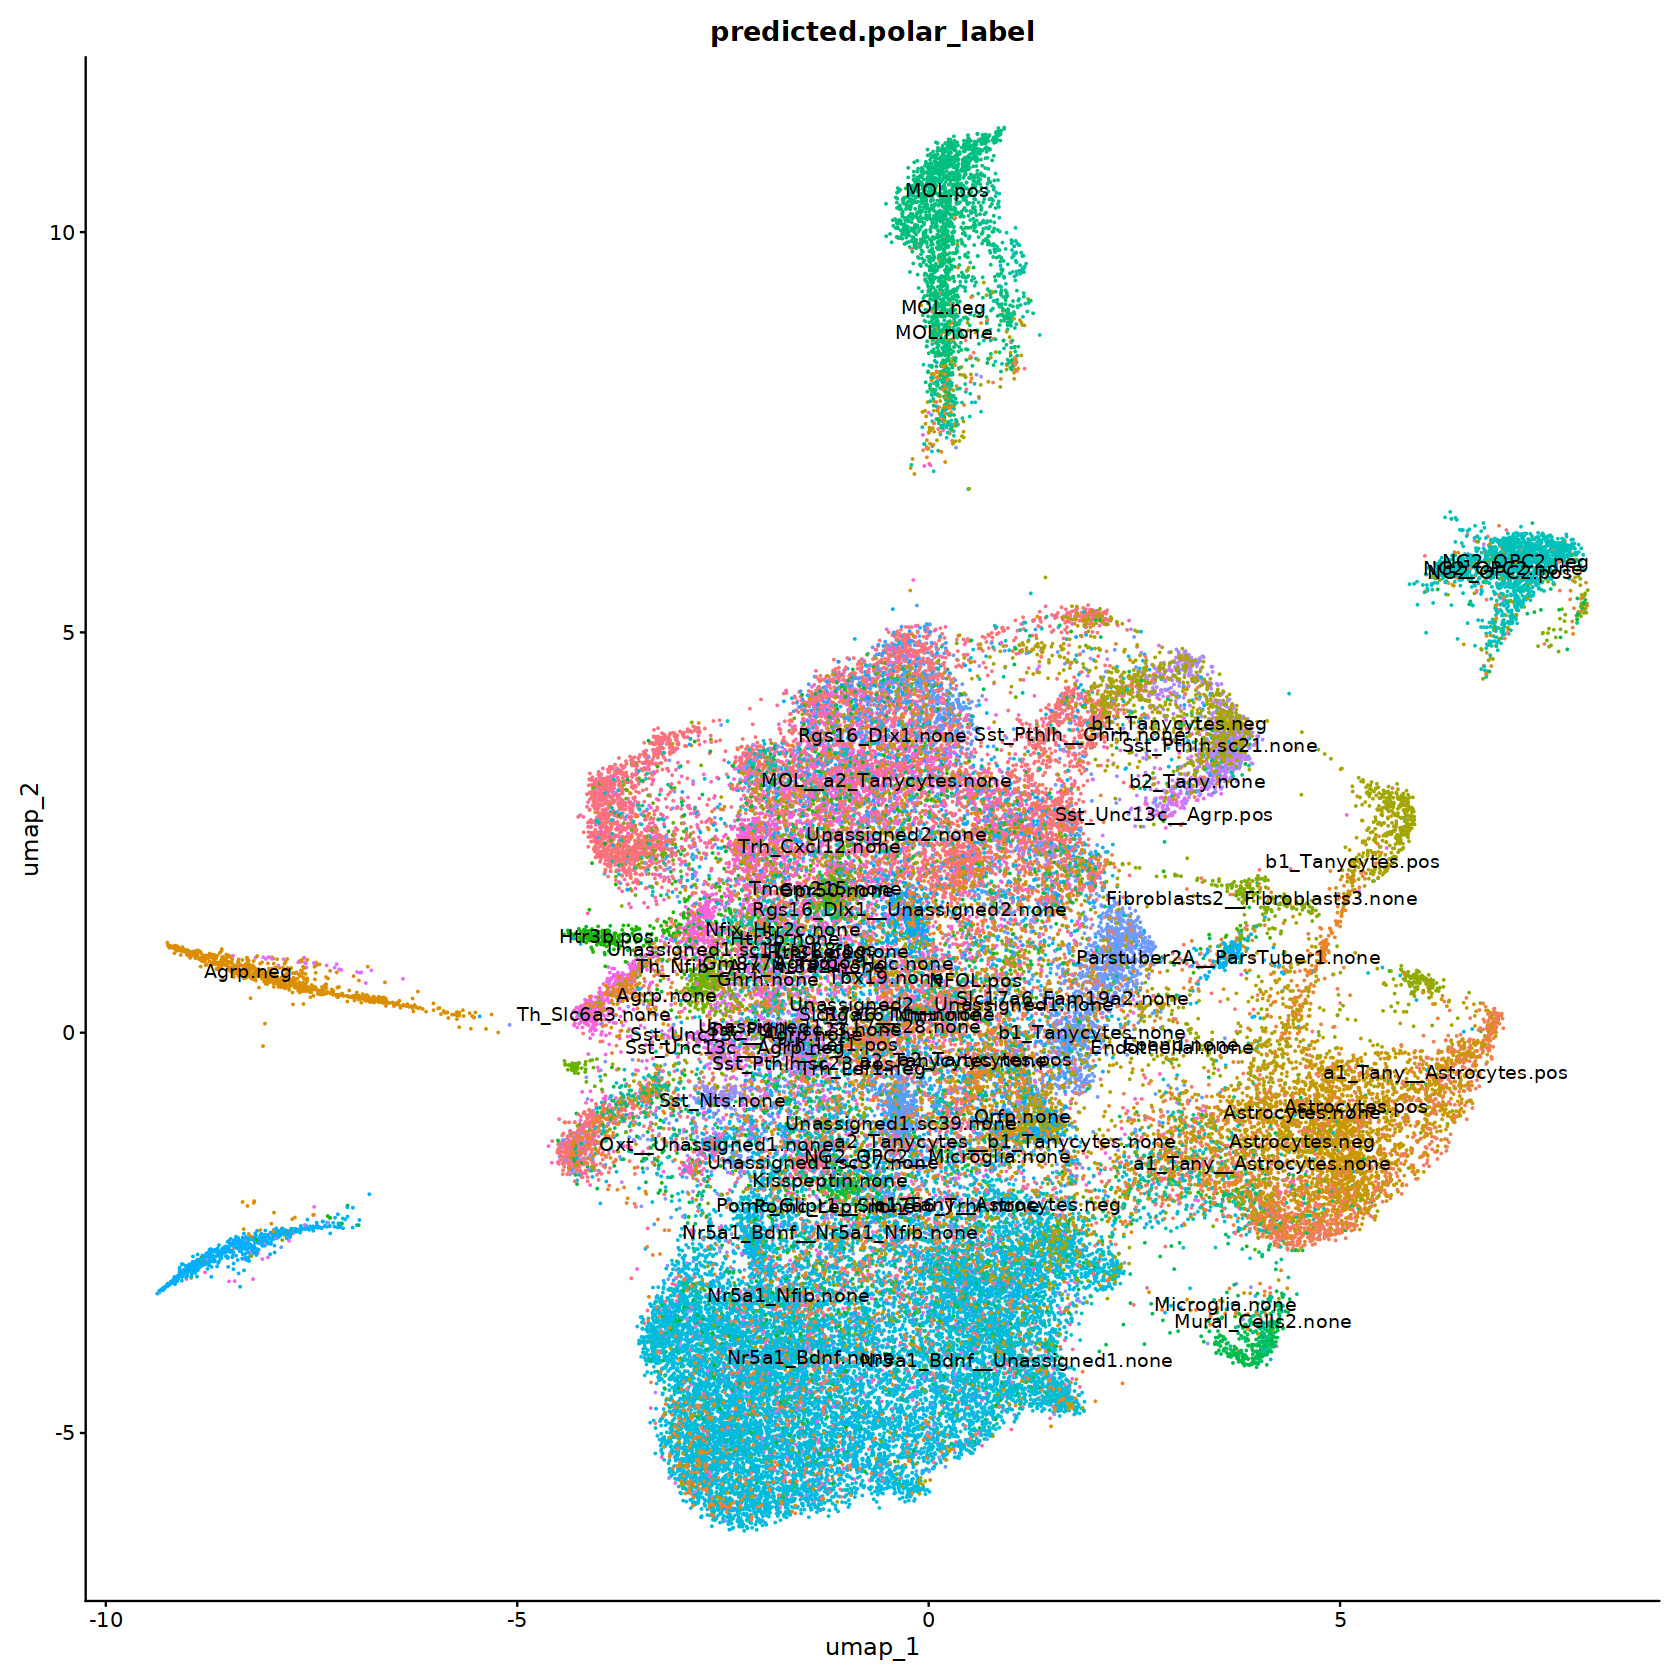

In [7]:
options(repr.plot.width=14, repr.plot.height=14)
DimPlot(xe_obj, reduction = "umap", group.by='predicted.polar_label', label=T) + NoLegend()